In [3]:
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import cifar10

(X_train, y_train), (X_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train[:2], y_train[:2])

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 1

In [6]:
max(map(max, y_train))

9

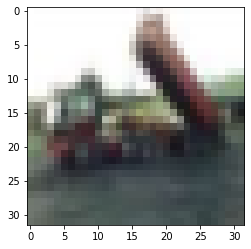

In [7]:
import matplotlib.pyplot as plt

digit = X_train[2]
plt.imshow(digit)
plt.show()

In [10]:
import numpy as np
np.set_printoptions(linewidth=150)
print(X_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [11]:
X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))
X_train.shape, X_test.shape

((50000, 3072), (10000, 3072))

In [12]:
X_train= X_train.astype(float)/255
X_test = X_test.astype(float)/255
print(X_train[0])

[0.23137255 0.24313725 0.24705882 ... 0.48235294 0.36078431 0.28235294]


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=2045)

In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [15]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(32*32*3,)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(125, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 125)               32125     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1260      
Total params: 1,738,089
Trainable params: 1,738,089
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
Hist = model.fit(X_train, y_train, epochs=500, batch_size=512, validation_data=(X_valid, y_valid))

Epoch 1/500
79/79 [==============================] - 4s 11ms/step - loss: 2.2816 - accuracy: 0.1948 - val_loss: 1.8807 - val_accuracy: 0.3255
Epoch 2/500
79/79 [==============================] - 1s 8ms/step - loss: 1.8511 - accuracy: 0.3381 - val_loss: 1.8132 - val_accuracy: 0.3426
Epoch 3/500
79/79 [==============================] - 1s 8ms/step - loss: 1.7406 - accuracy: 0.3815 - val_loss: 1.7486 - val_accuracy: 0.3645
Epoch 4/500
79/79 [==============================] - 1s 8ms/step - loss: 1.6926 - accuracy: 0.3951 - val_loss: 1.6917 - val_accuracy: 0.3891
Epoch 5/500
79/79 [==============================] - 1s 8ms/step - loss: 1.6181 - accuracy: 0.4225 - val_loss: 1.6403 - val_accuracy: 0.4054
Epoch 6/500
79/79 [==============================] - 1s 8ms/step - loss: 1.5808 - accuracy: 0.4332 - val_loss: 1.5711 - val_accuracy: 0.4395
Epoch 7/500
79/79 [==============================] - 1s 8ms/step - loss: 1.5375 - accuracy: 0.4541 - val_loss: 1.5991 - val_accuracy: 0.4326
Epoch 8/500


In [19]:
loss, accuracy=model.evaluate(X_test, y_test)
loss, accuracy

313/313 [==============================] - 1s 2ms/step - loss: 4.7963 - accuracy: 0.4937


(4.79634952545166, 0.4936999976634979)

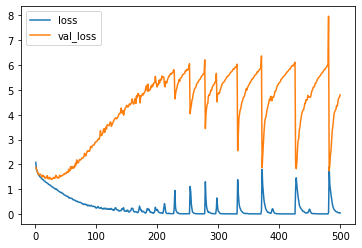

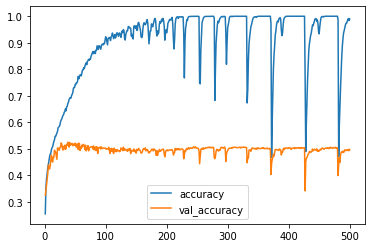

In [20]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist.history['loss'])+1)

plt.plot(epochs, Hist.history['loss'])
plt.plot(epochs, Hist.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

plt.plot(epochs, Hist.history['accuracy'])
plt.plot(epochs, Hist.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.show()

In [ ]:
print(model.predict_classes(X_test[:1,:]))